# Digit Recognizer

## 1. Imports

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from skimage import io
from skimage import feature

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

## 2. Load Data

In [5]:
data = pd.read_csv('data\\train.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df = data.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [11]:
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## 3. Image Processing

In [12]:
image = df.iloc[0].values[1:].reshape(28, 28)
image.shape

(28, 28)

d:\Programming\Python\MLDS_1020\.env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


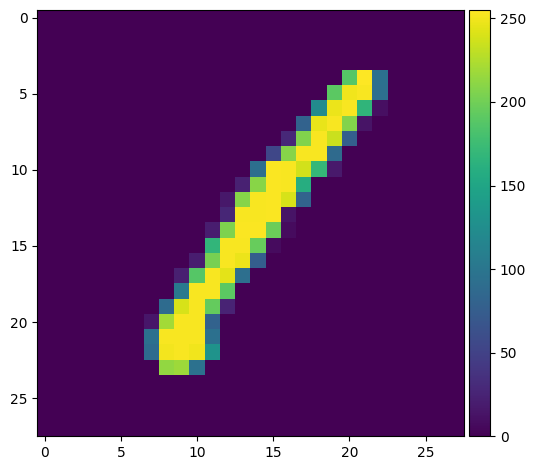

In [13]:
io.imshow(image)

In [14]:
image.max()

255

## 4. Data Splitting

In [15]:
images = df.drop(columns=['label']).values
label = df.label

In [16]:
images = images / 255.0
images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
images.max()

1.0

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(
    images, label, test_size = 0.3, random_state = 33
)

## 6. Feature Extraction / Dimension Reduction

In [19]:
hog_feature_vector = np.array(np.zeros((81,)))

In [20]:
transform = lambda image: feature.hog(image.reshape(28, 28))

In [21]:
new_vector = np.array(list(map(transform, images)))

In [22]:
new_vector.shape

(42000, 81)

In [23]:
train_vector = np.array(list(map(transform, xtrain)))
test_vector = np.array(list(map(transform, xtest)))

In [24]:
test_vector.shape

(12600, 81)

## 6. Model

In [25]:
digit_recognizer = SVC()

In [26]:
digit_recognizer.fit(train_vector, ytrain)

SVC()

## 7. Evaluation

In [27]:
ypred = digit_recognizer.predict(test_vector)

In [28]:
report = classification_report(
    ytest, ypred
)

In [29]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1247
           1       0.99      0.99      0.99      1455
           2       0.97      0.97      0.97      1244
           3       0.96      0.97      0.97      1321
           4       0.96      0.97      0.97      1221
           5       0.98      0.97      0.98      1133
           6       0.98      0.99      0.98      1245
           7       0.97      0.96      0.96      1317
           8       0.96      0.95      0.96      1206
           9       0.96      0.96      0.96      1211

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



## 8. Hyper-parameter tuning

In [30]:
grid = RandomizedSearchCV(
    digit_recognizer,
    param_distributions = {
        "C": np.arange(1, 100, 2),
        "kernel": ['rbf', 'linear', 'poly', 'sigmoid'],
        "degree": [3, 4, 5, 6, 7],
        "gamma": ['scale', 'auto'],
        "decision_function_shape": ['ovo', 'ovr']
    },
    cv=10,
    scoring='accuracy', 
    n_jobs = -1
)

In [31]:
feature_vector = np.array(list(map(transform, images)))

In [32]:
feature_vector.shape

(42000, 81)

In [33]:
grid.fit(feature_vector, label)

RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': [3, 4, 5, 6, 7],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   scoring='accuracy')

In [34]:
grid.best_score_

0.9745476190476191

In [35]:
grid.best_params_

{'kernel': 'poly',
 'gamma': 'scale',
 'degree': 4,
 'decision_function_shape': 'ovo',
 'C': 31}

In [40]:
grid.best_estimator_

SVC(C=31, decision_function_shape='ovo', degree=4, kernel='poly')

## 9. Pipeline

In [56]:
class PreProcessor(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        pass
    
    def fit(self, X, y=None):
        self.X = X
        self.y = y
        return self
    
    def transform(self, X, y=None):
        transform = lambda image: feature.hog(image.reshape(28, 28)/255.0)
        feature_vector = np.array(list(map(transform, self.X)))
        return feature_vector

In [57]:
pipeline = Pipeline([
    ('feature_extractor', PreProcessor()),
    ('digit_recognizer', SVC(
        C=31, 
        decision_function_shape='ovo', 
        degree=4, 
        kernel='poly', 
        gamma='scale'
        )
    )
])

In [58]:
pipeline.fit(images, label)

Pipeline(steps=[('feature_extractor', PreProcessor()),
                ('digit_recognizer',
                 SVC(C=31, decision_function_shape='ovo', degree=4,
                     kernel='poly'))])

In [65]:
ypred = pipeline.predict(images)

In [66]:
report2 = classification_report(label, ypred)

In [67]:
print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       1.00      1.00      1.00      4684
           2       1.00      1.00      1.00      4177
           3       1.00      1.00      1.00      4351
           4       1.00      1.00      1.00      4072
           5       1.00      1.00      1.00      3795
           6       1.00      1.00      1.00      4137
           7       1.00      1.00      1.00      4401
           8       1.00      1.00      1.00      4063
           9       1.00      1.00      1.00      4188

    accuracy                           1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000

